<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 
</p>    
<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.
<p>
Le modèle étudié se base sur les données fournies par le site de StackOverFlow.
</p>
<p>
Ce notebook présente un système de suggestion de TAGS basé sur des méthodes statistiques.
</p>
<p>
Le traitement des données réalisé dans le notebook 'P6_DataAnalysis' sont utilisées pour alimenter les modèles.
</p>



In [120]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import p6_util
import p6_util_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 5 Statistical TAGS assignement methods

**Loading cleaned train dataset.**

In [20]:
import p5_util
file_name='./data/ser_sof_train.dump'
ser_sof_train = p5_util.object_load(file_name)
print(ser_sof_train.shape)

p5_util.object_load : fileName= ./data/ser_sof_train.dump
(24604,)


**Loading test dataset**

In [21]:
import pandas as pd
file_name="./data/test_StackOverFlow_BodyTitleTags.csv"
df_sof_test=pd.read_csv(file_name)

In [22]:
df_sof_test['Body']=df_sof_test['Body']+df_sof_test['Title']

**Loading target : list of TAGs from SOF**

In [23]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)
print(df_sof_tags.shape)
list_sof_tag = df_sof_tags.TagName.tolist( )

(50000, 2)


## 5.1 Features creation from Bag of Words

* Dataset is tokenized
* Corpus is represented as a matrix
* Matrix values are tokens frequencies (TF)

**BOW Vectorization with (1-GRAM terms)**

In [72]:
embeding_mode='bow'

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
ngram=1
vectorizer_bow = CountVectorizer(min_df=0.001, max_df=.1, ngram_range=(ngram, ngram))
csr_matrix_bow = vectorizer_bow.fit_transform(ser_sof_train)

print(csr_matrix_bow.shape)

(24604, 2463)


The 24604 posts are expanded over 2463 features.

### 5.1.1 BOW evaluation

For each raw from CSR matrix, the N greater values are extracted.

Matching Key words from columns are chosen from vacabulary.

Those keywords are assigned as TAGS.


In [113]:
nb_test = int(len(df_sof_test)/500)

modulo=int(nb_test/10)
nb_test, modulo

(32, 3)

In [134]:
import p6_util
dict_match_result = p6_util.p6_score_mean_string_simlarity(nb_test, df_sof_test, list_sof_tag\
    , vectorizer_bow, csr_matrix_bow,p_tag_ratio=None, embeding_mode='bow' )


Test mode bow covering 32 documents

Processed documents : 3/32
Processed documents : 6/32
Processed documents : 9/32
Processed documents : 12/32
Processed documents : 15/32
Processed documents : 18/32
Processed documents : 21/32
Processed documents : 24/32
Processed documents : 27/32
Processed documents : 30/32


In [135]:
import p5_util
file_name='./data/dict_match_result_bow_stat.dump'
p5_util.object_dump(dict_match_result, file_name)

In [199]:
import p5_util
file_name='./data/dict_match_result_bow_stat.dump'
dict_match_result = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/dict_match_result_bow_stat.dump


In [200]:
import p6_util
arr_similarity_result, arr_matching_result = p6_util.p6_stat_compute_result(dict_match_result)


*** Mean similarity indice >100: 96.88 %

*** Mean similarity indice = 0: 0.00 %

*** Matching results : 21.88 %


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


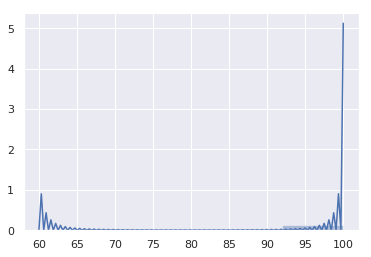

In [201]:
import seaborn as sns, numpy as np
sns.set()
#x = np.random.randn(100)
ax = sns.distplot(arr_similarity_result)

/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


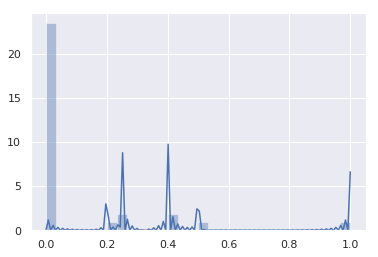

In [202]:
ax = sns.distplot(arr_matching_result, bins=30)

In [159]:
import numpy as np

arr_index = np.where(arr_matching_result>=0.4)[0]
[print(dict_match_result[index]) for index in list(arr_index)]

(100.0, 1.0, ['iphone'], ['iphone'])
(100.0, 0.4, ['database', 'ion', 'eve', 'oracle', 'out'], ['database', 'oracle', 'command', 'line', 'client'])
(100.0, 0.4, ['rinside', 'locale', 'set', 'utf', 'kismet-wireless'], ['c++', 'unicode', 'locale', 'utf', 'ucs'])
(100.0, 0.5, ['csv', 'aws-elasticfilesystem', 'perl', 'table'], ['html', 'perl', 'html', 'table'])


[None, None, None, None]

## 5.2 TF-IDF  with ngram=(1,1)

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
# When building vacabulary, terms with frequency document < p_min_df are ignored.
p_min_df = 0.001

# When building vacabulary, terms with frequency document> p_max_df are ignored.
p_max_df = 1.

ngram1=1
ngram2=1
vectorizer_tfidf_ngram1=TfidfVectorizer(norm="l2", use_idf=True, min_df=p_min_df, max_df=p_max_df, ngram_range=(ngram1, ngram2))

csr_matrix_tfidf_ngram1 = vectorizer_tfidf_ngram1.fit_transform(ser_sof_train)

print(csr_matrix_tfidf_ngram1.shape)

(24604, 2482)


In [161]:
print("MIN DF= "+str(p_min_df)+"  MAX DF = "+str(p_max_df))

MIN DF= 0.001  MAX DF = 1.0


In [162]:
nb_test = int(len(df_sof_test)/500)

modulo=int(nb_test/10)
print("Nb tests= {} Module={}".format(nb_test, modulo))

Nb tests= 32 Module=3


In [163]:
import p6_util
dict_match_result = p6_util.p6_score_mean_string_simlarity(nb_test, df_sof_test, list_sof_tag\
    , vectorizer_tfidf_ngram1, csr_matrix_tfidf_ngram1,p_tag_ratio=None, embeding_mode='tfidf' )


Test mode tfidf covering 32 documents

Processed documents : 3/32
Processed documents : 6/32
Processed documents : 9/32
Processed documents : 12/32
Processed documents : 15/32
Processed documents : 18/32
Processed documents : 21/32
Processed documents : 24/32
Processed documents : 27/32
Processed documents : 30/32


In [164]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1_stat.dump'
p5_util.object_dump(dict_match_result, file_name)

In [203]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1_stat.dump'
dict_match_result = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/dict_match_result_tfidf_ngram1_stat.dump


In [204]:
import p6_util
arr_similarity_result, arr_matching_result = p6_util.p6_stat_compute_result(dict_match_result)


*** Mean similarity indice >100: 96.88 %

*** Mean similarity indice = 0: 0.00 %

*** Matching results : 34.38 %


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


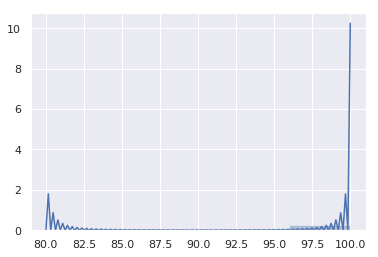

In [205]:
import seaborn as sns, numpy as np
sns.set()
np.random.seed(0)
#x = np.random.randn(100)
ax = sns.distplot(arr_similarity_result)

/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


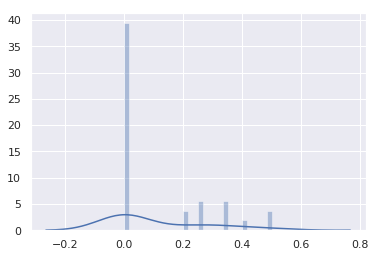

In [206]:
ax = sns.distplot(arr_matching_result, bins=30)

* Terms having a frequency occurence greater then ``p_max_df`` threshold are ignored
* Terms having a frequency occurence less then ``p_min_df`` threshold are ignored

## 5.3 TF-IDF  with ngram=(2,2)

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

ngram1=2
ngram2=2
vectorizer_tfidf_ngram2=TfidfVectorizer(norm="l2", use_idf=True, min_df=p_min_df, max_df=p_max_df, ngram_range=(ngram1, ngram2))

csr_matrix_tfidf_ngram2 = vectorizer_tfidf_ngram2.fit_transform(ser_sof_train)

print(csr_matrix_tfidf_ngram2.shape)

(24604, 1142)


In [171]:
nb_test = int(len(df_sof_test)/500)

modulo=int(nb_test/10)
print("Nb tests= {} Module={}".format(nb_test, modulo))

Nb tests= 32 Module=3


In [172]:
import p6_util
dict_match_result = p6_util.p6_score_mean_string_simlarity(nb_test, df_sof_test, list_sof_tag\
    , vectorizer_tfidf_ngram2, csr_matrix_tfidf_ngram2,p_tag_ratio=None, embeding_mode='tfidf' )


Test mode tfidf covering 32 documents

Processed documents : 3/32
Processed documents : 6/32
Processed documents : 9/32
Processed documents : 12/32
Processed documents : 15/32
Processed documents : 18/32
Processed documents : 21/32
Processed documents : 24/32
Processed documents : 27/32
Processed documents : 30/32


In [173]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram2_stat.dump'
p5_util.object_dump(dict_match_result, file_name)

In [207]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram2_stat.dump'
dict_match_result = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/dict_match_result_tfidf_ngram2_stat.dump


In [208]:
import p6_util
arr_similarity_result, arr_matching_result = p6_util.p6_stat_compute_result(dict_match_result)


*** Mean similarity indice >100: 21.88 %

*** Mean similarity indice = 0: 28.12 %

*** Matching results : 6.25 %


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


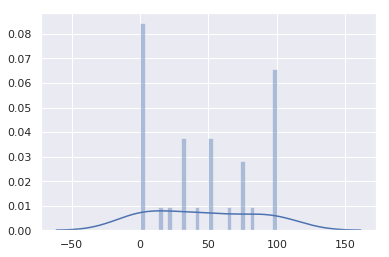

In [209]:
import seaborn as sns, numpy as np
sns.set()
np.random.seed(0)
#x = np.random.randn(100)
ax = sns.distplot(arr_similarity_result, bins=30)

/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


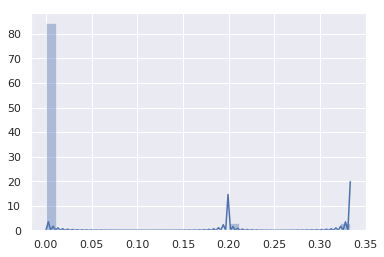

In [210]:
ax = sns.distplot(arr_matching_result, bins=30)

## 5.4. TF-IDF  with ngram=(1,2)

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

ngram1=1
ngram2=2
vectorizer_tfidf_ngram1_2=TfidfVectorizer(norm="l2", use_idf=True, min_df=p_min_df, max_df=p_max_df, ngram_range=(ngram1, ngram2))

csr_matrix_tfidf_ngram1_2 = vectorizer_tfidf_ngram1_2.fit_transform(ser_sof_train)

print(csr_matrix_tfidf_ngram1_2.shape)

(24604, 3624)


In [179]:
nb_test = int(len(df_sof_test)/500)

modulo=int(nb_test/10)
print("Nb tests= {} Module={}".format(nb_test, modulo))

Nb tests= 32 Module=3


In [180]:
import p6_util
dict_match_result = p6_util.p6_score_mean_string_simlarity(nb_test, df_sof_test, list_sof_tag\
    , vectorizer_tfidf_ngram1_2, csr_matrix_tfidf_ngram1_2,p_tag_ratio=None, embeding_mode='tfidf' )


Test mode tfidf covering 32 documents

Processed documents : 3/32
Processed documents : 6/32
Processed documents : 9/32
Processed documents : 12/32
Processed documents : 15/32
Processed documents : 18/32
Processed documents : 21/32
Processed documents : 24/32
Processed documents : 27/32
Processed documents : 30/32


In [181]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1_2_stat.dump'
p5_util.object_dump(dict_match_result, file_name)

In [211]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1_2_stat.dump'
dict_match_result = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/dict_match_result_tfidf_ngram1_2_stat.dump


In [212]:
import p6_util
arr_similarity_result, arr_matching_result = p6_util.p6_stat_compute_result(dict_match_result)


*** Mean similarity indice >100: 100.00 %

*** Mean similarity indice = 0: 0.00 %

*** Matching results : 28.12 %


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bangui/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/bangui/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/bangui/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

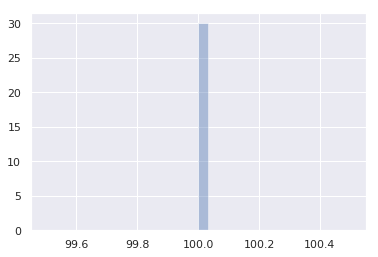

In [214]:
import seaborn as sns, numpy as np
sns.set()
#x = np.random.randn(100)
ax = sns.distplot(arr_similarity_result, bins=30)

/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


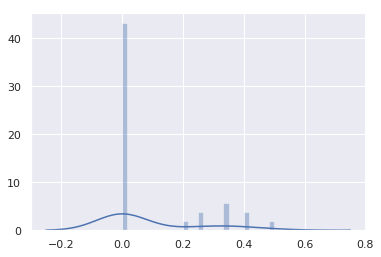

In [215]:
ax = sns.distplot(arr_matching_result, bins=30)

## 5.5. TF_IDF Vectorization optmization

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
# When building vacabulary, terms with frequency document < p_min_df are ignored.
p_min_df = 0.0005

# When building vocabulary, terms with frequency document> p_max_df are ignored.
p_max_df = 1.

ngram1=1
ngram2=1
vectorizer_tfidf_ngram1=TfidfVectorizer(norm="l2", use_idf=True, min_df=p_min_df, max_df=p_max_df, ngram_range=(ngram1, ngram2))

csr_matrix_tfidf_ngram1 = vectorizer_tfidf_ngram1.fit_transform(ser_sof_train)

print(csr_matrix_tfidf_ngram1.shape)

(24604, 3677)


In [187]:
print("MIN DF= "+str(p_min_df)+"  MAX DF = "+str(p_max_df))

MIN DF= 0.0005  MAX DF = 1.0


In [188]:
nb_test = int(len(df_sof_test)/500)

modulo=int(nb_test/10)
print("Nb tests= {} Module={}".format(nb_test, modulo))

Nb tests= 32 Module=3


In [189]:
import p6_util
dict_match_result = p6_util.p6_score_mean_string_simlarity(nb_test, df_sof_test, list_sof_tag\
    , vectorizer_tfidf_ngram1, csr_matrix_tfidf_ngram1,p_tag_ratio=None, embeding_mode='tfidf' )


Test mode tfidf covering 32 documents

Processed documents : 3/32
Processed documents : 6/32
Processed documents : 9/32
Processed documents : 12/32
Processed documents : 15/32
Processed documents : 18/32
Processed documents : 21/32
Processed documents : 24/32
Processed documents : 27/32
Processed documents : 30/32


In [190]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1plus_stat.dump'
p5_util.object_dump(dict_match_result, file_name)

In [216]:
import p5_util
file_name='./data/dict_match_result_tfidf_ngram1plus_stat.dump'
dict_match_result = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/dict_match_result_tfidf_ngram1plus_stat.dump


In [217]:
import p6_util
arr_similarity_result, arr_matching_result = p6_util.p6_stat_compute_result(dict_match_result)


*** Mean similarity indice >100: 96.88 %

*** Mean similarity indice = 0: 0.00 %

*** Matching results : 40.62 %


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


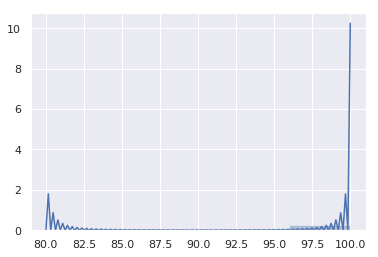

In [218]:
import seaborn as sns, numpy as np
sns.set()
np.random.seed(0)
#x = np.random.randn(100)
ax = sns.distplot(arr_similarity_result)

/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


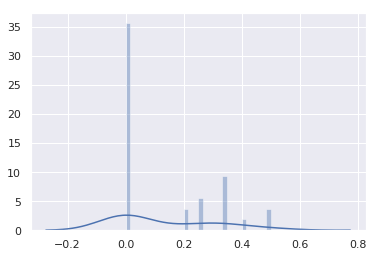

In [219]:
ax = sns.distplot(arr_matching_result, bins=30)